In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc

In [5]:
sns.set_palette('colorblind')
sns.set_style('whitegrid', {"grid.linestyle": ":"})

#Reading the data and the getting basic details about the data.

In [6]:
df = pd.read_csv('aerofit_treadmill.csv')

In [7]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [9]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


All data types in int or float format are described above and their mean value provides the valueable information about the demographic of the population. This will be explainde in details later.

In [10]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [11]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

###There are no null values, so **data imputation** is not required.

From describe command the output shows that there are multiple unique values (refer df.nunique()) in the attributes, **Age, Income and Miles**. This variation is too much for analysing the data visually and in a better way. This requires cutting the data in multiple 'Bins' providing the data to be concise for visualization.

In [12]:
#Attribute to Bins : Age
bins_age = [17,22,26,30,34,38,42,46,50]
labels_age = ['18-22','22-26','26-30','30-34','34-38','38-42','42-46','46-50']
df['Age_bin'] = pd.cut(df['Age'], bins  = bins_age, labels = labels_age , ordered = True)
#Attribute to Bins Income:
bins_income = [20000,40000,60000,80000,110000]
labels_income = ['20-40 k','40-60 k','60-80 k','80-110 k']
df['Income_bin'] = pd.cut(df['Income'], bins  = bins_income, labels = labels_income , ordered = True)
#Attribute to Bins Income:
bins_miles = [20,50,80,110,360]
labels_miles = ['21-50','51-80','80-110', '110-360']
df['Miles_bin'] = pd.cut(df['Miles'],bins = bins_miles,labels = labels_miles, ordered = True)
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bin,Income_bin,Miles_bin
0,KP281,18,Male,14,Single,3,4,29562,112,18-22,20-40 k,110-360
1,KP281,19,Male,15,Single,2,3,31836,75,18-22,20-40 k,51-80
2,KP281,19,Female,14,Partnered,4,3,30699,66,18-22,20-40 k,51-80
3,KP281,19,Male,12,Single,3,3,32973,85,18-22,20-40 k,80-110
4,KP281,20,Male,13,Partnered,4,2,35247,47,18-22,20-40 k,21-50
...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,38-42,80-110 k,110-360
176,KP781,42,Male,18,Single,5,4,89641,200,38-42,80-110 k,110-360
177,KP781,45,Male,16,Single,5,5,90886,160,42-46,80-110 k,110-360
178,KP781,47,Male,18,Partnered,4,5,104581,120,46-50,80-110 k,110-360


The prices of the 3 products is provided in the help sheet. The prices needs to be added in the table (df).

In [13]:
df1 = pd.DataFrame({'Product' : ['KP281', 'KP481', 'KP781'],
                    'Price' : [1500,1750,2500]})
df = df.merge(df1,how='left',on= 'Product')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bin,Income_bin,Miles_bin,Price
0,KP281,18,Male,14,Single,3,4,29562,112,18-22,20-40 k,110-360,1500
1,KP281,19,Male,15,Single,2,3,31836,75,18-22,20-40 k,51-80,1500
2,KP281,19,Female,14,Partnered,4,3,30699,66,18-22,20-40 k,51-80,1500
3,KP281,19,Male,12,Single,3,3,32973,85,18-22,20-40 k,80-110,1500
4,KP281,20,Male,13,Partnered,4,2,35247,47,18-22,20-40 k,21-50,1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,38-42,80-110 k,110-360,2500
176,KP781,42,Male,18,Single,5,4,89641,200,38-42,80-110 k,110-360,2500
177,KP781,45,Male,16,Single,5,5,90886,160,42-46,80-110 k,110-360,2500
178,KP781,47,Male,18,Partnered,4,5,104581,120,46-50,80-110 k,110-360,2500


#Univariate analysis (Graphical)

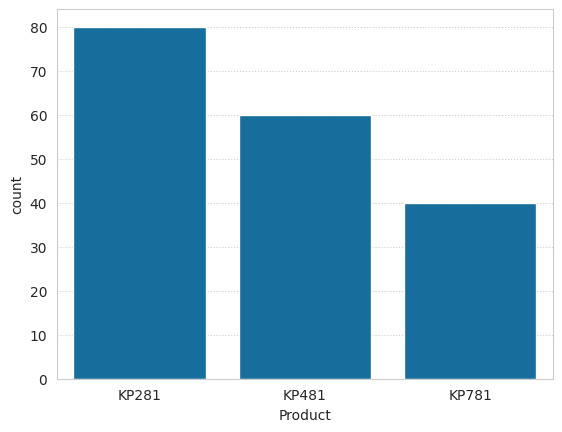

In [14]:
#Analysis of Products sold.
sns.countplot(data = df, x = "Product")
plt.show()

1. The most sold product is KP281 followed by KP481 and KP781.
2. Market awareness about the product KP481 and KP781's benefits to be highlighted to sell them more.

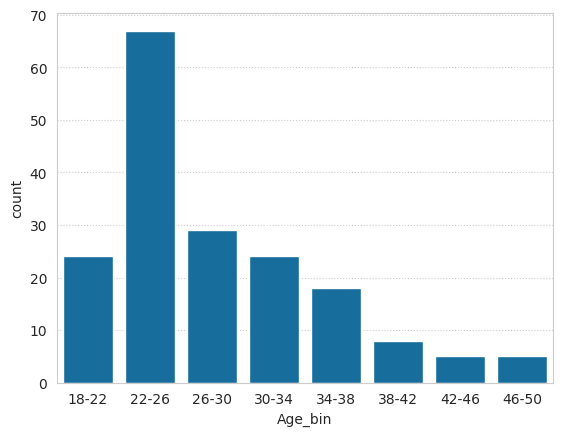

In [15]:
#Analysis of variation of Age groups
sns.countplot(data = df, x = 'Age_bin')
plt.show()

1. Above graph shows the varioation of customer ages.
2. Majority customers are from age 18-30. This means that the marketing needs to target the people from age 30 and above for the better sales in the age groups.

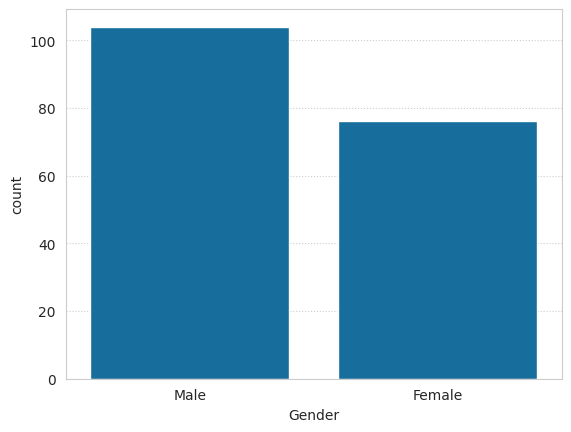

In [16]:
#Analysis of variation of Gender
sns.countplot(data = df, x = 'Gender')
plt.show()

1. The data show that around 38% of the customers are females.
The awareness about the product can be improved in the Female demographic.

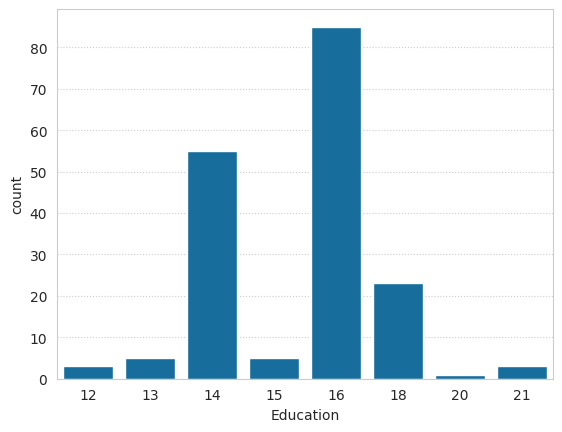

In [17]:
#Analysis of variation of Education
sns.countplot(data= df, x = 'Education')
plt.show()

1. The demographic variation across attribute Education shows that most people study for 14 and 16 followed by 18 years.

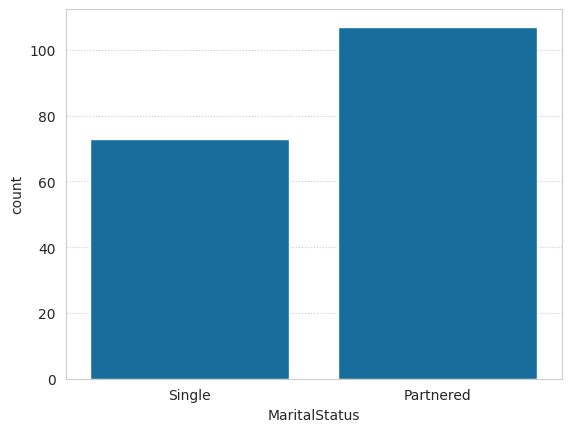

In [18]:
# Analysis of variation across 'MaritalStatus'
sns.countplot(data = df, x = 'MaritalStatus')
plt.show()

1. Customers who are partnered are buying more products than the single customers.
2. This data shows that partnered people are sharing the machine with their respective partner.
3. Marketing for single peoples can be improved.

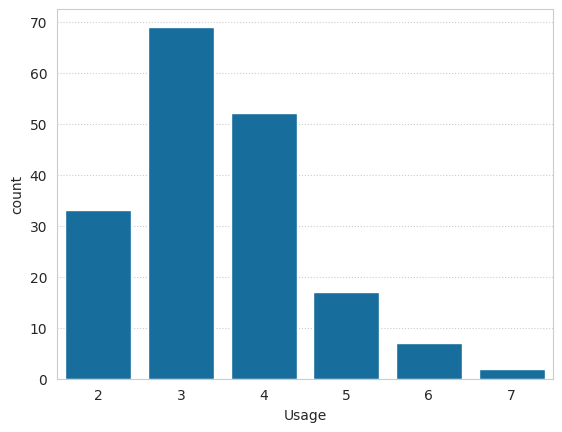

In [19]:
#Analysis of variation across 'Usage'
sns.countplot(data = df, x = 'Usage')
plt.show()

1. Majority of the people plan to use the tradmill 3 times a week followed by 4 times a week and 2 times a week.
2. This shows the people buying the treadmill will use tredmill alternate days rather than everyday.

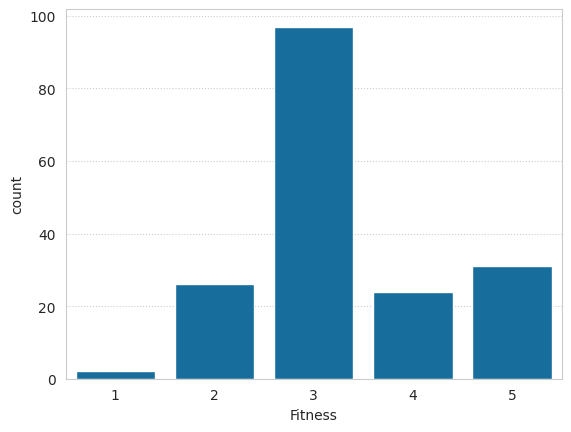

In [20]:
#Analysis of variation across'Fitness'
sns.countplot(data = df, x = 'Fitness')
plt.show()

1. This data shows that more number of people who buys treadmill are trying to improve their fitness from a mode of 3 towards followed by 2 and 4 fitness rating.
2. This data fails to provide the actual fitness levels, as data shows the fitness level of by the user herself/himself.
3. The demographic of the people who rate themselves as fitness level 1 and 2 needed to be targetted in better way.

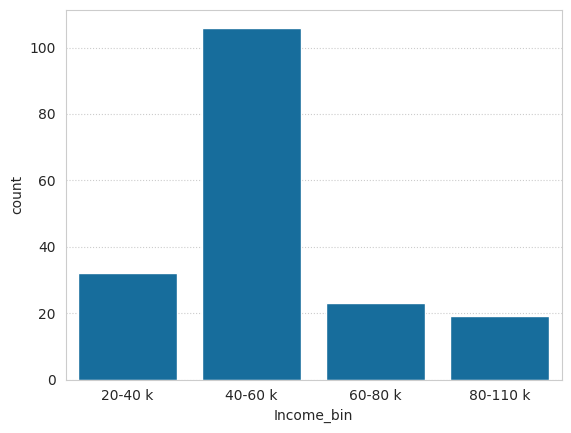

In [21]:
# Analysis of variation of 'Income'
sns.countplot(data = df, x = 'Income_bin')
plt.show()

1. Most of the customers fall in the range of 40-60 k income followed by 20-40 k.
2. The marketing of the treadmills can be to acquire the customres from income range 60 k and above. This requires further data to understand why the cutomers with higher income range are not buying the products.
3. The market survey should also consider data of customers using other facilities of exercises.

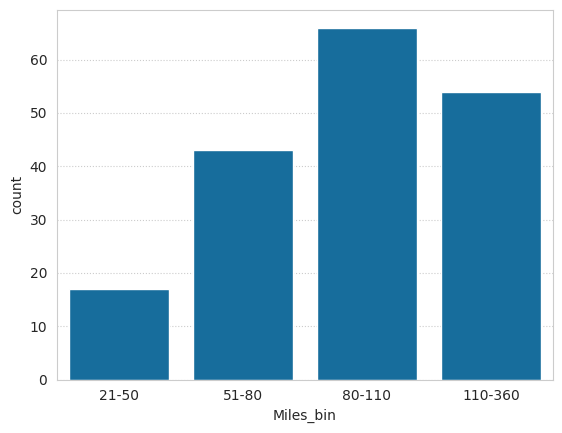

In [22]:
# Analysis of variation of the 'Miles'
sns.countplot(data = df, x = 'Miles_bin')
plt.show()

1. Most of the users are expecting using the treadmill to about 80-100 miles each week followed by 110-360 miles a week.
2. This data helps us to plan the maintenance cycle of the treadmill for overhauling and lubrication , replacement of parts as well as mean miles/week.
3. The cutomer with higher number of miles might be sharing the machine with multiple users or are professional atheletes , marathoners and avid runners.

# Multivariate Analysis
This section provide the effect of the demographic of one attribute to other attribute.

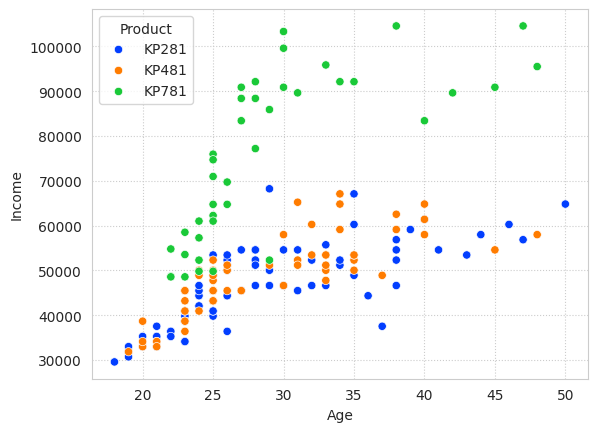

In [23]:
# Analysis of variation of Age and Income on product type.
sns.scatterplot(data = df , x = 'Age' , y = 'Income' , hue = 'Product', palette = 'bright')
plt.show()

1. Above graph represents the scatterplot of the Age vs Income with hue of Product.
2. This shows that the customer age > 30 and having income < 70000 prefer KP281 and KP781.
3. People with higher income i.e. >70000 prefer KP781.
4. People with Age ~ 25 and below with income range of < 70000 have also bought KP781.
5. There is a linear relation between the Age and Income with product type KP281+KP481.
6. The product pricing of KP781 needs to be analysed to have more number of sales.

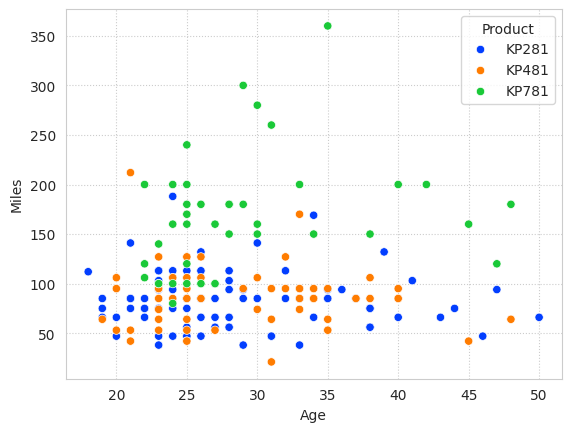

In [24]:
# Analysis of variation of Age and miles on product type.
sns.scatterplot(data = df , x = 'Age' , y = 'Miles' , hue = 'Product', palette = 'bright')
plt.show()

In [25]:
print('Average miles for KP281 and KP481 =' ,df[df['Product'] != 'KP781']['Miles'].mean().round(2))
print('Average miles for KP781 =', df[df['Product'] == 'KP781']['Miles'].mean().round(2))

Average miles for KP281 and KP481 = 84.99
Average miles for KP781 = 166.9


1. There are more people in the Age range 18-30 with KP281 and KP481 treadmill.
2. The users of KP281 and KP481, have average miles/week of 85 and ther users of KP781 have higher mean miles/week .i.e. 166.9.

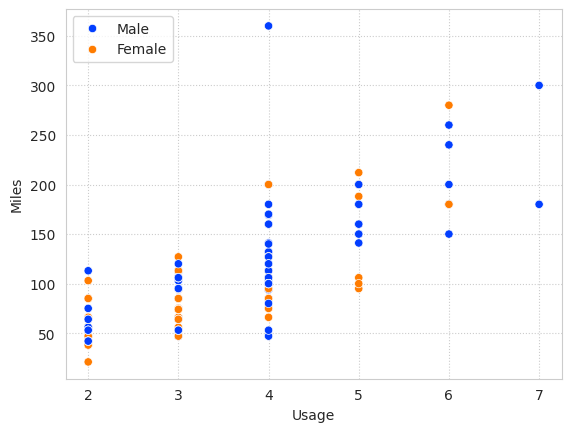

In [41]:
# Analysis of variation of Usage and Miles on Gender type.
sns.scatterplot(data = df , x = 'Usage' , y = 'Miles' , hue = 'Gender', palette = 'bright')
plt.legend(loc = 'upper left')
plt.show()

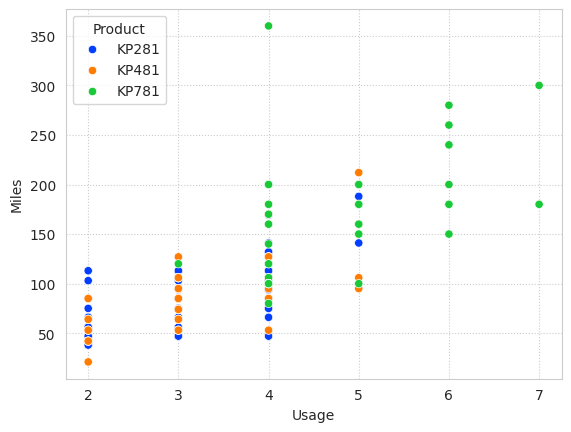

In [26]:
# Analysis of variation of Usage and Miles on Product type.
sns.scatterplot(data = df , x = 'Usage' , y = 'Miles' , hue = 'Product', palette = 'bright')
plt.show()

In [27]:
print('The average miles of user with expected usage below 4 days per week is =',df[df['Usage']< 4]['Miles'].mean().round(2))
print('The average miles of user with expected usage above 4 days per week is =',df[df['Usage']> 4]['Miles'].mean().round(2))
df.groupby(['Product','Usage']).agg({'Product' : 'count'})

The average miles of user with expected usage below 4 days per week is = 75.37
The average miles of user with expected usage above 4 days per week is = 180.85


Product
Product Usage         
KP281   2           19
        3           37
        4           22
        5            2
KP481   2           14
        3           31
        4           12
        5            3
KP781   3            1
        4           18
        5           12
        6            7
        7            2

1. The Usage vs Miles data shows the customer exepctations vs reality. This data show that there are not many outliers.
2. The Usage and purchase of KP781 are linearly related.
3. The seriousness of the customer for fitness is reflected in the product variant purchasing. KP781 users are having Usage >3 and most are at Usage 4 and 5.
4. The most common usage is 3 and they purchase mostly KP281 followed by KP481.

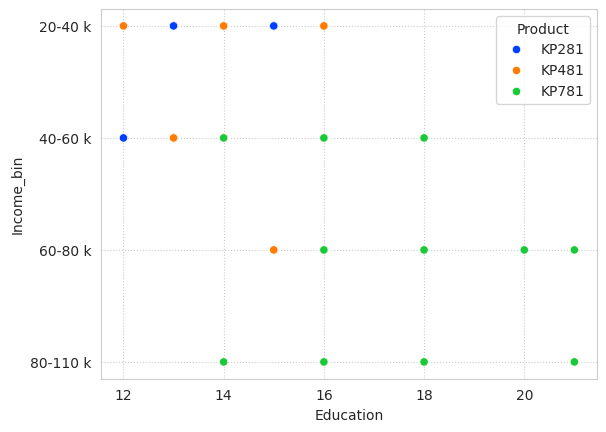

In [28]:
# Analysis of variation of Education and Income on Product type.
sns.scatterplot(data = df , x = 'Education' , y = 'Income_bin' , hue = 'Product', palette = 'bright')
plt.show()

Heatmap of correlation of data parameters.

<ipython-input-29-2d3646dd07cf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<Axes: >

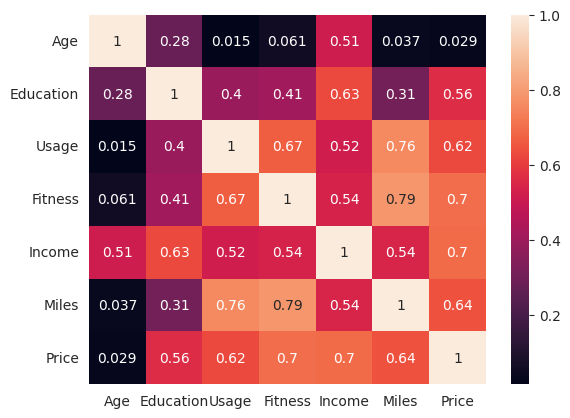

In [29]:
sns.heatmap(df.corr(),annot = True)

Insights based on Marginal and Conditional Probablities

Product Vs Gender

In [30]:
print(pd.crosstab(df['Product'],df['Gender'],margins= True, normalize = 'columns'))
print()
print('_*' * 25)
print()
print(pd.crosstab(df['Gender'],df['Product'],margins= True, normalize = 'columns'))

Gender     Female      Male       All
Product                              
KP281    0.526316  0.384615  0.444444
KP481    0.381579  0.298077  0.333333
KP781    0.092105  0.317308  0.222222

_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*

Product  KP281     KP481  KP781       All
Gender                                   
Female     0.5  0.483333  0.175  0.422222
Male       0.5  0.516667  0.825  0.577778


1. 38.46 % of total Males and 53.63% of Total Females have purchased KP281.
2. 38.15 % of total Males and 29.80% of Total Females have purchased KP481.
3. 31.73 % of total Males and 09.21% of Total Females have purchased KP781.
4. 50% of users of KP281 are Male and remaining 50% are Females.
5. 51.67 % of users of KP481 are male and 48.33% are Females.
6. 82.5% od users of KP781 are male and 17.5% are Females.

Product vs Age

In [31]:
print(pd.crosstab(df['Product'],df['Age_bin'],margins= True, normalize = 'columns'))
print()
print('_*' * 25)
print()
print(pd.crosstab(df['Age_bin'],df['Product'],margins= True, normalize = 'columns'))

Age_bin     18-22     22-26     26-30     30-34     34-38  38-42  42-46  \
Product                                                                   
KP281    0.583333  0.402985  0.482759  0.333333  0.500000  0.375    0.6   
KP481    0.291667  0.358209  0.137931  0.541667  0.388889  0.375    0.2   
KP781    0.125000  0.238806  0.379310  0.125000  0.111111  0.250    0.2   

Age_bin  46-50       All  
Product                   
KP281      0.4  0.444444  
KP481      0.2  0.333333  
KP781      0.4  0.222222  

_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*

Product   KP281     KP481  KP781       All
Age_bin                                   
18-22    0.1750  0.116667  0.075  0.133333
22-26    0.3375  0.400000  0.400  0.372222
26-30    0.1750  0.066667  0.275  0.161111
30-34    0.1000  0.216667  0.075  0.133333
34-38    0.1125  0.116667  0.050  0.100000
38-42    0.0375  0.050000  0.050  0.044444
42-46    0.0375  0.016667  0.025  0.027778
46-50    0.0250  0.016667  0.050  0.027778


1. Maximum customer are from range 22-26 followed by 26-30.
2. Maximum sold equipment across all age groups is KP281 followed by KP481.
3. The market of KP781 is highest in age range 46-50 followed by 26-30.
4. The distribution across all the age groups is skewed to lower ages.
5. Sales to the people with Age > 30 is needed to be increased.


Product Vs Education

In [32]:
print(pd.crosstab(df['Product'],df['Education'],margins= True, normalize = 'columns'))
print()
print('_*' * 25)
print()
print(pd.crosstab(df['Education'],df['Product'],margins= True, normalize = 'columns'))

Education        12   13        14   15        16        18   20   21  \
Product                                                                 
KP281      0.666667  0.6  0.545455  0.8  0.458824  0.086957  0.0  0.0   
KP481      0.333333  0.4  0.418182  0.2  0.364706  0.086957  0.0  0.0   
KP781      0.000000  0.0  0.036364  0.0  0.176471  0.826087  1.0  1.0   

Education       All  
Product              
KP281      0.444444  
KP481      0.333333  
KP781      0.222222  

_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*

Product     KP281     KP481  KP781       All
Education                                   
12         0.0250  0.016667  0.000  0.016667
13         0.0375  0.033333  0.000  0.027778
14         0.3750  0.383333  0.050  0.305556
15         0.0500  0.016667  0.000  0.027778
16         0.4875  0.516667  0.375  0.472222
18         0.0250  0.033333  0.475  0.127778
20         0.0000  0.000000  0.025  0.005556
21         0.0000  0.000000  0.075  0.016667


1. People with Education background of 16 years is the maximum customer base followed by 14 years.
2. As education increases the demand of higher variant is increasing and as education is near 12 , the demand of the lower variant is increasing.
This helps in deducing that the benefits of the higher variants is not fully communicated to customer.
3. The education background is affecting the yearly income this is the cause of the above observation. This is evident from one of the scatterplot above.

Product vs Fitness

In [33]:
print(pd.crosstab(df['Product'],df['Fitness'],margins= True, normalize = 'columns'))
print()
print('_*' * 25)
print()
print(pd.crosstab(df['Fitness'],df['Product'],margins= True, normalize = 'columns'))

Fitness    1         2         3         4         5       All
Product                                                       
KP281    0.5  0.538462  0.556701  0.375000  0.064516  0.444444
KP481    0.5  0.461538  0.402062  0.333333  0.000000  0.333333
KP781    0.0  0.000000  0.041237  0.291667  0.935484  0.222222

_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*

Product   KP281     KP481  KP781       All
Fitness                                   
1        0.0125  0.016667  0.000  0.011111
2        0.1750  0.200000  0.000  0.144444
3        0.6750  0.650000  0.100  0.538889
4        0.1125  0.133333  0.175  0.133333
5        0.0250  0.000000  0.725  0.172222


1. The customer with lower fitness levels are needed to be increased.
2. The most common customer is from Fitness level 3 and followed by 5.
3. We need to reach customer with the lower fitness level of 1 and 2 by increasing the fitness awareness.
4. People with lower fitness levels buy KP281 and KP481 as their beginner training equipment.
5. Maximum of the KP781 user are with fitness level of 5, i.e. regular trainers. This kind of customers needs to be targeted as these people are training and need latest technology and are need of treadmill.

Product vs Income

In [34]:
print(pd.crosstab(df['Product'],df['Income_bin'],margins= True, normalize = 'columns'))
print()
print('_*' * 25)
print()
print(pd.crosstab(df['Income_bin'],df['Product'],margins= True, normalize = 'columns'))

Income_bin  20-40 k   40-60 k   60-80 k  80-110 k       All
Product                                                    
KP281       0.71875  0.481132  0.260870       0.0  0.444444
KP481       0.28125  0.415094  0.304348       0.0  0.333333
KP781       0.00000  0.103774  0.434783       1.0  0.222222

_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*

Product      KP281     KP481  KP781       All
Income_bin                                   
20-40 k     0.2875  0.150000  0.000  0.177778
40-60 k     0.6375  0.733333  0.275  0.588889
60-80 k     0.0750  0.116667  0.250  0.127778
80-110 k    0.0000  0.000000  0.475  0.105556


1. The income vs Product (i.e. cost of product) is directly proportional.
2. The customer is earning more is buying more expensive product.
3. KP781 users have higher income than 40k and most KP781 users are belo 60k.
4. Category of customer with 40-60 k income is buying the KP481.

Product vs MaritalStatus

In [35]:
print(pd.crosstab(df['Product'],df['MaritalStatus'],margins= True, normalize = 'columns'))
print()
print('_*' * 25)
print()
print(pd.crosstab(df['MaritalStatus'],df['Product'],margins= True, normalize = 'columns'))

MaritalStatus  Partnered    Single       All
Product                                     
KP281           0.448598  0.438356  0.444444
KP481           0.336449  0.328767  0.333333
KP781           0.214953  0.232877  0.222222

_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*

Product        KP281  KP481  KP781       All
MaritalStatus                               
Partnered        0.6    0.6  0.575  0.594444
Single           0.4    0.4  0.425  0.405556


1. The partition of 60 Partnered and 40 single of Marital status is constant across the product line.
2. The Partnered people are getting equipment for combined training activity with their significant other.


Product vs Miles

In [36]:
print(pd.crosstab(df['Product'],df['Miles_bin'],margins= True, normalize = 'columns'))
print()
print('_*' * 25)
print()
print(pd.crosstab(df['Miles_bin'],df['Product'],margins= True, normalize = 'columns'))

Miles_bin     21-50     51-80    80-110   110-360       All
Product                                                    
KP281      0.705882  0.604651  0.409091  0.277778  0.444444
KP481      0.294118  0.372093  0.469697  0.148148  0.333333
KP781      0.000000  0.023256  0.121212  0.574074  0.222222

_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*

Product     KP281     KP481  KP781       All
Miles_bin                                   
21-50      0.1500  0.083333  0.000  0.094444
51-80      0.3250  0.266667  0.025  0.238889
80-110     0.3375  0.516667  0.200  0.366667
110-360    0.1875  0.133333  0.775  0.300000


#Recommendation

1.   The most users are preferring KP281 with income lower than the 60000. This can be changed by increasing the KP481 product pricing from 1750 to 2100. This will create the higher spacing from the KP281, simultaneously incresing the exculisivity of the KP481. People looking for KP481 might shift to higher model KP781 as price spacing is reduced. Previously customer is preffering the KP281 due to lesser pricre point.
2. If pricing is not to be touched, then additional product can be introducedd with price point of 2100. The products are spacing is leftly skewed and the products are required to be in the region of price 1750 to 2500. This gives customer ladder to climb so that the average ticket size is increased.
3. The number of Females is not equal to the Males. The targeted ads can be improved.
4. Market awareness about the product KP481 and KP781's benefits to be highlighted to sell them more.
5. Majority customers are from age 18-30. This means that the marketing needs to target the people from age 30 and above for the better sales in the age groups.
6. Marketing for single peoples can be improved by designed ads with appeal of being Partnered.
7. The marketing of the treadmills can be to acquire the customres from income range 60 k and above.



